In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Test 1

In [2]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [3]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [4]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

             spam     click     offer    winner       buy      free      cash  \
spam     1.000000  0.051323  0.097010  0.107764 -0.031855  0.316570  0.237014   
click    0.051323  1.000000 -0.001762 -0.001392 -0.003124 -0.005735 -0.003454   
offer    0.097010 -0.001762  1.000000 -0.002275 -0.005106  0.109339 -0.005646   
winner   0.107764 -0.001392 -0.002275  1.000000 -0.004035 -0.007407  0.199283   
buy     -0.031855 -0.003124 -0.005106 -0.004035  1.000000 -0.016623 -0.010011   
free     0.316570 -0.005735  0.109339 -0.007407 -0.016623  1.000000 -0.008204   
cash     0.237014 -0.003454 -0.005646  0.199283 -0.010011 -0.008204  1.000000   
urgent   0.068547 -0.001245 -0.002035 -0.001608 -0.003608 -0.006624  0.041561   
allcaps -0.039272 -0.004301 -0.007030 -0.005554 -0.012465 -0.022883 -0.013782   

           urgent   allcaps  
spam     0.068547 -0.039272  
click   -0.001245 -0.004301  
offer   -0.002035 -0.007030  
winner  -0.001608 -0.005554  
buy     -0.003608 -0.012465  
free    -

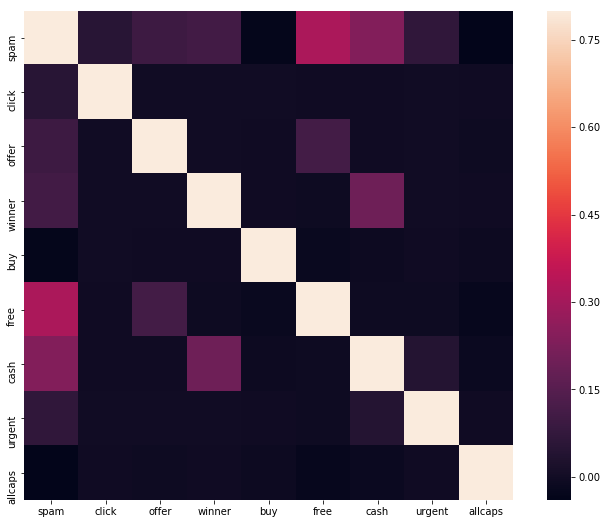

In [5]:
corrmat = sms_raw.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

**Test 1:**

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])
       
'free' and 'spam' had highest correlation. 'cash'/'spam' and 'cash'/'winner' had second highest. 

# Test 2

In [6]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 
                       'greetings', 'general', 'affordable', 'bankruptcy']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [7]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076


In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

                spam     click     offer    winner       buy      free  \
spam        1.000000  0.051323  0.097010  0.107764 -0.031855  0.316570   
click       0.051323  1.000000 -0.001762 -0.001392 -0.003124 -0.005735   
offer       0.097010 -0.001762  1.000000 -0.002275 -0.005106  0.109339   
winner      0.107764 -0.001392 -0.002275  1.000000 -0.004035 -0.007407   
buy        -0.031855 -0.003124 -0.005106 -0.004035  1.000000 -0.016623   
free        0.316570 -0.005735  0.109339 -0.007407 -0.016623  1.000000   
cash        0.237014 -0.003454 -0.005646  0.199283 -0.010011 -0.008204   
urgent      0.068547 -0.001245 -0.002035 -0.001608 -0.003608 -0.006624   
greetings  -0.005272 -0.000440 -0.000719 -0.000568 -0.001275 -0.002340   
general    -0.005272 -0.000440 -0.000719 -0.000568 -0.001275 -0.002340   
affordable       NaN       NaN       NaN       NaN       NaN       NaN   
bankruptcy       NaN       NaN       NaN       NaN       NaN       NaN   
allcaps    -0.039272 -0.004301 -0.0070

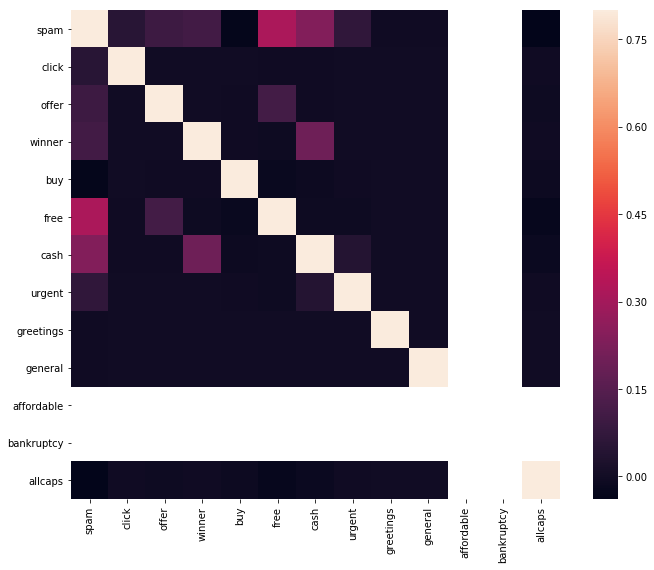

In [9]:
corrmat = sms_raw.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

**Test 2 Results:**
-Add 'greetings', 'general', 'affordable', 'bankruptcy'

With 20% Holdout: 0.884304932735426
Testing on Sample: 0.8916008614501076

array([0.89784946, 0.89426523, 0.89426523, 0.890681  , 0.89605735,
       0.89048474, 0.88150808, 0.89028777, 0.88489209, 0.89568345])

Same keyword correlations as test 1.  'affordable' and 'bankruptcy' were not included at all. Got same exact numbers in tests.

# Test 3

In [10]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 
                       'greetings', 'general', 'affordable', 'bankruptcy', 'order', 'clearance', 
                       'shopper', 'meet', 'singles', 'income', 'boss', 'babes', 'make','opportunity']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [11]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8834080717488789
Testing on Sample: 0.8921392677674085


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.89784946, 0.88888889, 0.89426523, 0.890681  , 0.89784946,
       0.88868941, 0.88330341, 0.88669065, 0.88489209, 0.89388489])

                 spam     click     offer    winner       buy      free  \
spam         1.000000  0.051323  0.097010  0.107764 -0.031855  0.316570   
click        0.051323  1.000000 -0.001762 -0.001392 -0.003124 -0.005735   
offer        0.097010 -0.001762  1.000000 -0.002275 -0.005106  0.109339   
winner       0.107764 -0.001392 -0.002275  1.000000 -0.004035 -0.007407   
buy         -0.031855 -0.003124 -0.005106 -0.004035  1.000000 -0.016623   
free         0.316570 -0.005735  0.109339 -0.007407 -0.016623  1.000000   
cash         0.237014 -0.003454 -0.005646  0.199283 -0.010011 -0.008204   
urgent       0.068547 -0.001245 -0.002035 -0.001608 -0.003608 -0.006624   
greetings   -0.005272 -0.000440 -0.000719 -0.000568 -0.001275 -0.002340   
general     -0.005272 -0.000440 -0.000719 -0.000568 -0.001275 -0.002340   
affordable        NaN       NaN       NaN       NaN       NaN       NaN   
bankruptcy        NaN       NaN       NaN       NaN       NaN       NaN   
order        0.057396 -0.

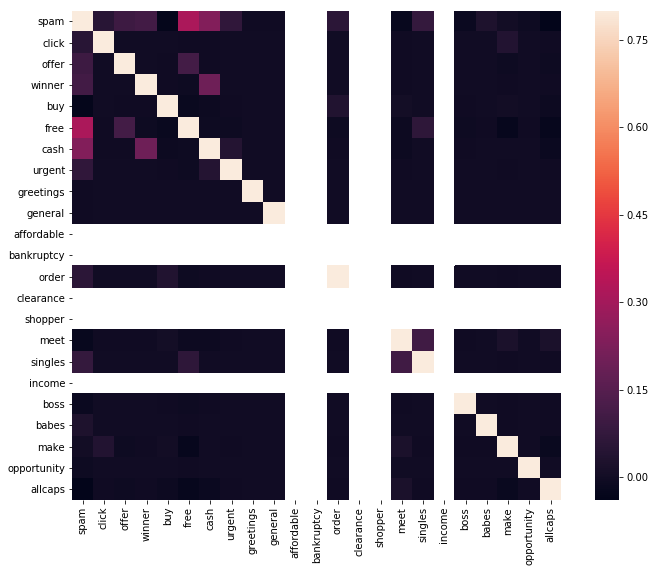

In [13]:
corrmat = sms_raw.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

**Test 3 Results:**
-Add 'order', 'clearance', 'shopper', 'meet', 'singles', 'income', 'boss', 'babes', 'make','opportunity'

With 20% Holdout: 0.8834080717488789
Testing on Sample: 0.8921392677674085

array([0.89784946, 0.88888889, 0.89426523, 0.890681  , 0.89784946,
       0.88868941, 0.88330341, 0.88669065, 0.88489209, 0.89388489])
       
'affordable', 'income', 'shopper', 'clearance', 'bankruptcy' were not included

'spam'/'free', 'spam'/'cash', 'winner'/'cash' higher correlations

# Test 4

In [14]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = keywords = ['click', 'offer', 'buy', 'cash', 'urgent', 
                       'greetings', 'general', 'affordable', 'bankruptcy', 'order', 'clearance', 
                       'shopper', 'meet', 'singles', 'income', 'boss', 'babes', 'make','opportunity']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [15]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8663677130044843
Testing on Sample: 0.8783201722900216


In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.87634409, 0.87992832, 0.87275986, 0.88351254, 0.88172043,
       0.87612208, 0.87253142, 0.87769784, 0.87410072, 0.87589928])

                 spam     click     offer       buy      cash    urgent  \
spam         1.000000  0.051323  0.097010 -0.031855  0.237014  0.068547   
click        0.051323  1.000000 -0.001762 -0.003124 -0.003454 -0.001245   
offer        0.097010 -0.001762  1.000000 -0.005106 -0.005646 -0.002035   
buy         -0.031855 -0.003124 -0.005106  1.000000 -0.010011 -0.003608   
cash         0.237014 -0.003454 -0.005646 -0.010011  1.000000  0.041561   
urgent       0.068547 -0.001245 -0.002035 -0.003608  0.041561  1.000000   
greetings   -0.005272 -0.000440 -0.000719 -0.001275 -0.001410 -0.000508   
general     -0.005272 -0.000440 -0.000719 -0.001275 -0.001410 -0.000508   
affordable        NaN       NaN       NaN       NaN       NaN       NaN   
bankruptcy        NaN       NaN       NaN       NaN       NaN       NaN   
order        0.057396 -0.001588 -0.002595  0.034845 -0.005088 -0.001834   
clearance         NaN       NaN       NaN       NaN       NaN       NaN   
shopper           NaN    

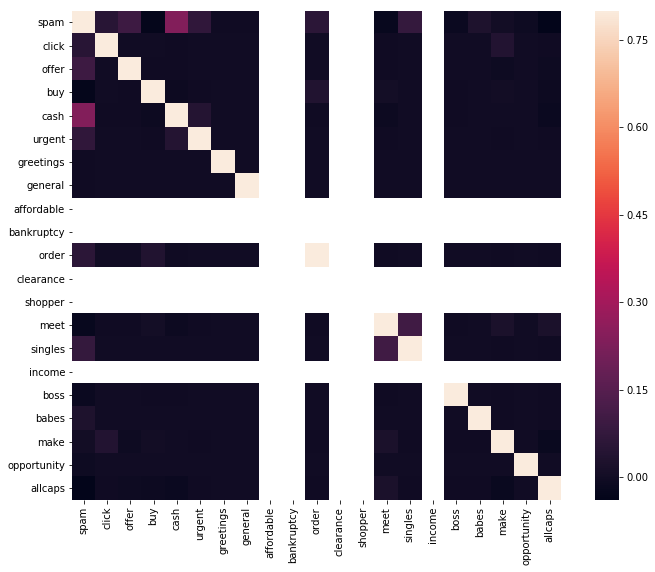

In [17]:
corrmat = sms_raw.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

**Test 4 Results:**
-Take out 'free' and 'winner'

With 20% Holdout: 0.8663677130044843
Testing on Sample: 0.8783201722900216

array([0.87634409, 0.87992832, 0.87275986, 0.88351254, 0.88172043,
       0.87612208, 0.87253142, 0.87769784, 0.87410072, 0.87589928])

Cash/spam had highest correlation.  Overall correlations are down.

# Test 5

In [18]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = keywords = ['click', 'offer', 'buy', 'urgent', 'greetings', 'general', 'order', 'meet', 
                       'singles', 'boss', 'babes', 'make','opportunity', 'earn', 'fees', 'credit', 'debt', 
                       'solution']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [19]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.8573991031390135
Testing on Sample: 0.8702440775305097


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.86917563, 0.86917563, 0.86738351, 0.87096774, 0.87455197,
       0.86714542, 0.86894075, 0.8705036 , 0.86510791, 0.86690647])

                 spam     click     offer       buy    urgent  greetings  \
spam         1.000000  0.051323  0.097010 -0.031855  0.068547  -0.005272   
click        0.051323  1.000000 -0.001762 -0.003124 -0.001245  -0.000440   
offer        0.097010 -0.001762  1.000000 -0.005106 -0.002035  -0.000719   
buy         -0.031855 -0.003124 -0.005106  1.000000 -0.003608  -0.001275   
urgent       0.068547 -0.001245 -0.002035 -0.003608  1.000000  -0.000508   
greetings   -0.005272 -0.000440 -0.000719 -0.001275 -0.000508   1.000000   
general     -0.005272 -0.000440 -0.000719 -0.001275 -0.000508  -0.000180   
order        0.057396 -0.001588 -0.002595  0.034845 -0.001834  -0.000648   
meet        -0.021220 -0.003730 -0.006097  0.006157 -0.004308  -0.001522   
singles      0.076166 -0.000984 -0.001608 -0.002852 -0.001136  -0.000402   
boss        -0.014920 -0.001245 -0.002035 -0.003608 -0.001438  -0.000508   
babes        0.028786 -0.000880 -0.001438 -0.002550 -0.001016  -0.000359   
make        

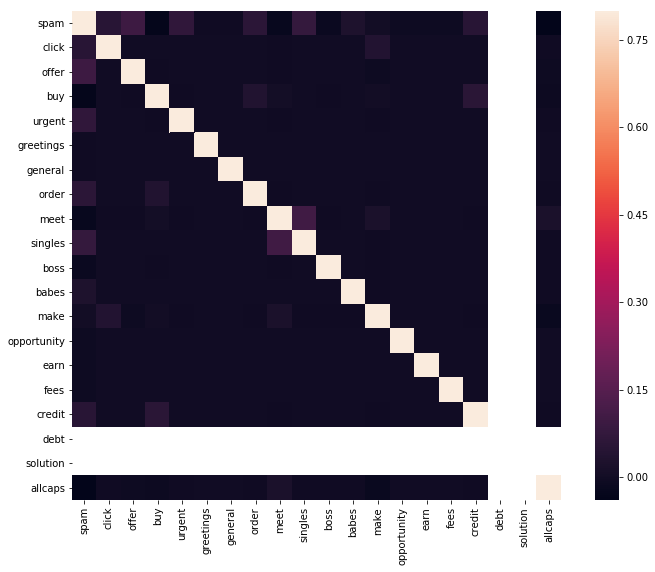

In [21]:
corrmat = sms_raw.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

**Test 5 Results:**
-Take out 'cash', 'affordable', 'bankruptcy', 'clearance', 'shopper', 'income.'  Add 'earn', 'fees', 'credit', 'debt', 'solution'

With 20% Holdout: 0.8573991031390135
Testing on Sample: 0.8702440775305097

array([0.86917563, 0.86917563, 0.86738351, 0.87096774, 0.87455197,
 0.86714542, 0.86894075, 0.8705036 , 0.86510791, 0.86690647])
       
'meet'/'singles' had highest correlation, but overlation correlation is pretty low.  'debt' and 'solution' were not included.

# Question Answers

1) Correlations were fairly low overal, so overfitting did not seem to be an issue.

2) Removing 'debt' from the fifth test group would have best results -

    ['click', 'offer', 'buy', 'urgent', 'greetings', 'general', 'order', 'meet', 
     'singles', 'boss', 'babes', 'make','opportunity', 'earn', 'fees', 'credit', 
     'solution']
     
3) 'free' and 'cash' had the highest correlation results.  Removing those brought down the overall correlations.